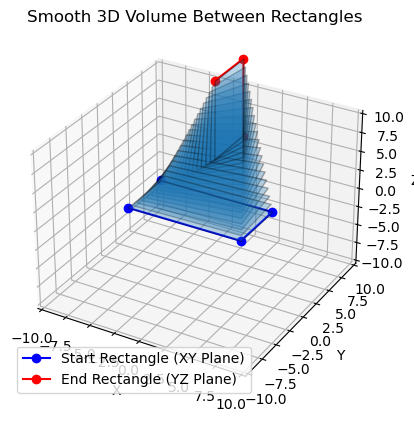

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to create a rectangle in 3D space
def create_rectangle(center, width, height, plane='xy'):
    if plane == 'xy':
        return np.array([
            [center[0] - width / 2, center[1] - height / 2, center[2]],
            [center[0] + width / 2, center[1] - height / 2, center[2]],
            [center[0] + width / 2, center[1] + height / 2, center[2]],
            [center[0] - width / 2, center[1] + height / 2, center[2]]
        ])
    elif plane == 'yz':
        return np.array([
            [center[0], center[1] - width / 2, center[2] - height / 2],
            [center[0], center[1] + width / 2, center[2] - height / 2],
            [center[0], center[1] + width / 2, center[2] + height / 2],
            [center[0], center[1] - width / 2, center[2] + height / 2]
        ])

# Function to interpolate between two rectangles
def interpolate_rectangles(rect1, rect2, resolution):
    interpolated_rects = []
    for t in np.linspace(0, 1, resolution):
        interpolated_rect = (1 - t) * rect1 + t * rect2
        interpolated_rects.append(interpolated_rect)
    return np.array(interpolated_rects)

# Function to generate and plot a 3D volume
def plot_3d_volume(rect1, rect2, resolution=20, min_growth=1.0, max_growth=1.0):
    # Ensure valid growth factors
    growth_factor1 = np.random.uniform(min_growth, max_growth)
    growth_factor2 = np.random.uniform(min_growth, max_growth)
    rect1 *= growth_factor1
    rect2 *= growth_factor2

    # Interpolate between the two rectangles
    interpolated_rects = interpolate_rectangles(rect1, rect2, resolution)

    # Create the plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each interpolated rectangle
    for rect in interpolated_rects:
        verts = [list(rect)]
        poly = Poly3DCollection(verts, alpha=0.3, edgecolor='k')
        ax.add_collection3d(poly)

    # Plot start and end rectangles explicitly
    ax.plot(*rect1.T, 'o-', label='Start Rectangle (XY Plane)', color='blue')
    ax.plot(*rect2.T, 'o-', label='End Rectangle (YZ Plane)', color='red')

    # Set labels and limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Smooth 3D Volume Between Rectangles')
    ax.legend()

    # Set limits for better visualization
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])

    # Save and show the plot
    plt.savefig("smooth_3d_volume.jpg", format='jpg')
    plt.show()

# Main function
def main():
    # Define two rectangles
    rect1 = create_rectangle(center=[0, 0, 0], width=10, height=5, plane='xy')
    rect2 = create_rectangle(center=[0, 5, 10], width=5, height=10, plane='yz')

    # Set options
    resolution = 20  # Number of interpolated steps
    min_growth = 0.8  # Minimum perimeter growth
    max_growth = 1.2  # Maximum perimeter growth

    # Generate and plot the 3D volume
    plot_3d_volume(rect1, rect2, resolution=resolution, min_growth=min_growth, max_growth=max_growth)

if __name__ == "__main__":
    main()
